# Lab 1

In [ ]:
# Import the libraries we'll use below.
import numpy as np
import matplotlib.pyplot as plt

## Data as matrices
Data usually comes in the form of matrices. The Python Numpy library makes it easy to manipulate matrices efficiently. See the [Numpy Tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html) for details.

In [ ]:
# Print these to make sure you understand what is being generated.
A: np.ndarray = np.array([1, 2, 3])
B: np.ndarray = np.arange(1, 13).reshape(3, 4)
C: np.ndarray = np.ones((2, 3))
D: np.ndarray = np.eye(3)

In [ ]:
A

array([1, 2, 3])

In [ ]:
B

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [ ]:
C

array([[1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
D

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

---
### Exercise 1: Matrix manipulation (8 points)

Perform the following computations using numpy functions and print the results. Note that the `*` operator implies matrix multiplication -- make sure the dimensions align!
1. 2A + 1
2. Sum the rows of B
3. Sum the columns of B
4. Number of elements of B greater than 5
5. C + C
6. A * B
7. (B * B) - D

In [ ]:
# 2A +1
2*A + 1

array([3, 5, 7])

In [ ]:
# Sum the rows of B
B.sum(axis=1)

array([10, 26, 42])

In [ ]:
# Sum the columns of B
B.sum(axis=0)

array([15, 18, 21, 24])

In [ ]:
# Number of elements of B greater than 5
B[B>5].size

7

In [ ]:
#C + C
C + C

array([[2., 2., 2.],
       [2., 2., 2.]])

In [ ]:
#A * B
np.matmul(A, B)

array([38, 44, 50, 56])

In [ ]:
# B*B - D
np.dot(B, B.T) - D

array([[ 29.,  70., 110.],
       [ 70., 173., 278.],
       [110., 278., 445.]])

---

## Data for Supervised Learning
Supervised learning is all about learning to make predictions: given an input $x$ (e.g. home square footage), can we produce an output $\hat{y}$ (e.g. estimated value) as close to the actual observed output $y$ (e.g. sale price) as possible. Note that the "hat" above $y$ is used to denote an estimated or predicted value.

Let's start by generating some artificial data. We'll create a vector of inputs, $X$, and a corresponding vector of target outputs $Y$. In general, we'll refer to invidual examples with a lowercase ($x$), and a vector or matrix containing multiple examples with a capital ($X$).

In [ ]:
from typing import Tuple, List, Dict

def create_1d_data(
    num_examples: int=10,
    w: int=2,
    b: int=1,
    random_scale: int=1,
    random_seed: int=4
) -> Tuple[np.ndarray, np.ndarray]:
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    random_scale: add uniform noise between -random_scale and +random_scale

  Returns:
    X and Y with shape (num_examples)
  """
  X: np.ndarray = np.arange(num_examples)
  np.random.seed(random_seed)  # consistent random number generation
  deltas = np.random.uniform(low=-random_scale, high=random_scale, size=X.shape)
  Y: np.ndarray = b + deltas + w * X
  return X, Y

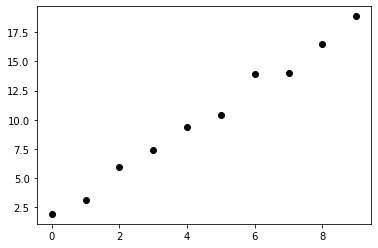

In [ ]:
# Create some artificial data using create_1d_data.
X, Y = create_1d_data()
plt.scatter(X, Y, color='black')
plt.show()

---
### Exercise 2: Models for Data (8 points)

A model is a function that takes an input $x$ and produces a prediction $\hat{y}$.

Let's consider two possible models for this data:
1. $M_1(x) = x+5$
2. $M_2(x) = 2x+1$

Compute the predictions of models $M_1$ and $M_2$ for the values in $X$. These predictions should be vectors of the same shape as $Y$. Then plot the prediction lines of these two models overlayed on the "observed" data $(X, Y)$. Use [plt.plot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) to draw the lines.

In [ ]:
# Create Models
M1: np.ndarray = X + 5
M2: np.ndarray = 2*X + 1

In [ ]:
# Validate Shapes
(M1.shape == Y.shape) & (M2.shape == Y.shape)

True

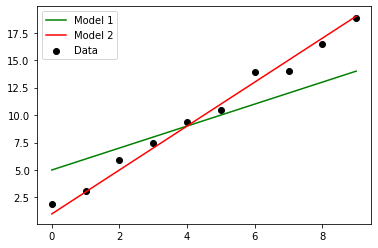

In [ ]:
# Model outputs
plt.scatter(X, Y, label="Data", color="black");
plt.plot(X, M1, label="Model 1", color="green");
plt.plot(X, M2, label="Model 2", color="red");
plt.legend(loc="upper left");

---

## Evaluation Metrics

How good are our models? Intuitively, the better the model, the more closely it fits the data we have. That is, for each $x$, we'll compare $y$, the true value, with $\hat{y}$, the predicted value. This comparison is often called the *loss* or the *error*. One common such comparison is *squared error*: $(y-\hat{y})^2$. Averaging over all our data points, we get the *mean squared error*:

\begin{equation}
\textit{MSE} = \frac{1}{|Y|} \sum_{y_i \in Y}(y_i - \hat{y}_i)^2
\end{equation}

---
### Exercise 3: Computing MSE (8 points)

Write a function for computing the MSE metric and use it to compute the MSE for the two models above, $M_1$ and $M_2$.

In [ ]:
def MSE(true_values: np.ndarray, predicted_values: np.ndarray) -> float:
  """Compute MSE (Mean Squared Error) based on actual and predicted values.

  Args:
    true_values (np.ndarray): A numpy array of actual values
    predicted_values (np.ndarray): A numpy array of predicted values by the model

  Returns:
    The MSE of the predicted values with respect to the actual values
  """
  return np.square(np.subtract(true_values,predicted_values)).mean()


In [ ]:
print ('MSE for M1:', MSE(Y, M1))
print ('MSE for M2:', MSE(Y, M2))

MSE for M1: 6.839502909434264
MSE for M2: 0.45821672338761366


---

## Generalization

Our data $(X, Y)$ represents just a sample of all possible input-output pairs we might care about. A model will be useful to the extent we can apply it to new inputs. Consider the more complex model below, which appears to produce a much smaller mean squared error.

In [ ]:
# Fit an 8-th degree polynomial to (X, Y). See np.polyfit for details.
polynomial_model_coefficients: np.ndarray = np.polyfit(X, Y, deg=8)
polynomial_model: np.poly1d = np.poly1d(polynomial_model_coefficients)
M3: np.ndarray = polynomial_model(X)

MSE for M3: 0.10941956925529832


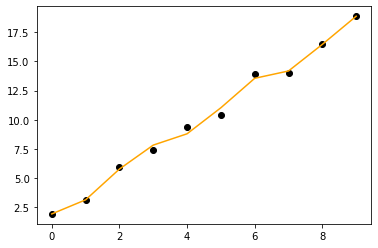

In [ ]:
fig = plt.scatter(X, Y, label="data", color="black")
plt.plot(X, M3, '-k', label="Model 3", color="orange")
print ('MSE for M3:', MSE(Y, M3))

---
### Exercise 4: Generalization (8 points)

Explain whether you expect $M_3$ to be better than $M_2$ at predicting the labels for new unseen inputs.

*Writen answer:*

M3 will not perform better than M2 at prediciting labels for unseen inputs. This is because M3 overfits on the data and is not expected to perform well on new / unseen inputs. It has low generalization. We can confirm this by running the `create_ld_data` on a larger sample and applying the models back

Performance over many random seeds:

In [ ]:
# Create some artificial data using create_1d_data.

model_performance: List[Tuple[float, float]] = []

for seed_x in range(1,1000):
  X_test, Y_test = create_1d_data(num_examples=10, random_seed=seed_x)
  M2_test: np.ndarray = 2*X_test + 1
  M3_test: np.ndarray = polynomial_model(X_test)
  mse_m2 = MSE(Y_test, M2_test)
  mse_m3 = MSE(Y_test, M3_test)
  model_performance.append([mse_m2, mse_m3])

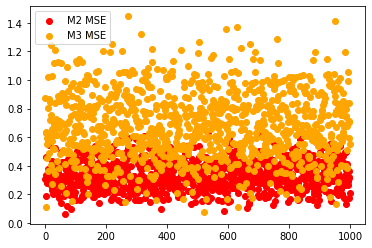

In [ ]:
plt.scatter(range(1,1000), [x[0] for x in model_performance], label="M2 MSE", color="red");
plt.scatter(range(1,1000), [x[1] for x in model_performance], label="M3 MSE", color="orange");
plt.legend(loc="upper left");

In [ ]:
print("Average MSE for Model 2: ", np.mean([x[0] for x in model_performance]))
print("Average MSE for Model 3: ", np.mean([x[1] for x in model_performance]))

Average MSE for Model 2:  0.33320666168058016
Average MSE for Model 3:  0.6841837105462756


After several random iterations, we note that:

* The average MSE for model 2 is less than model 3
* The variance of MSE for model 3 is greater than model 2

This means M2 generalizes better across an entire simulation of random points compared to M3

## Review

* In **Supervised Machine Learning**, we must start with data in the form $(X,Y)$ where $X$ are the inputs and $Y$ are the output labels.
* A **model** is a function that maps an input $x$ to an output $y$. The model's output is referred to as a **prediction**, denoted by $\hat{y}$.
* We **evaluate** predictions by comparing them to the true labels. This measurement is called a **loss** or **error**. For real-valued data, **mean squared error** is a common metric.
* A model is only as good as its ability to **generalize** to new examples.